## Import & Load Dataframes

In [128]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [129]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [130]:
# Load the data
df_loans = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Interviews/DS tech test/loans.csv')
df_attributes = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Interviews/DS tech test/attributes.csv')
df_tradeline = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Interviews/DS tech test/tradeline.csv')

In [131]:
# Show first few rows of loans dataset, as well as the shape, any missing values, and details.
print(df_loans.head())
print(df_loans.shape)
print(df_loans.info())
print(df_loans.isnull().sum())

       id      originationDate  income homeOwnerStatus      employmentStatus  \
0  439941  2021-07-28 17:41:50    1627            Rent  Employed - full time   
1  374508  2021-04-22 10:34:03    1290            Rent  Employed - full time   
2  404422  2021-06-10 12:31:53    1720             Own  Employed - full time   
3  392771  2021-05-24 08:07:55    1208             Own               Retired   
4  373259  2021-04-20 08:36:14    2241             Own  Employed - full time   

   interestRate  amount  term  early_settled  
0          5.69  5000.0    36              1  
1         40.92  2000.0    24              0  
2         28.50  2000.0    12              0  
3         23.27  1000.0    24              0  
4         16.16  5800.0    36              0  
(42662, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42662 entries, 0 to 42661
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4

In [132]:
# Show first few rows of attributes dataset, as well as the shape, any missing values, and details.

print(df_attributes.shape)
print(df_attributes.info())
print(df_attributes.isnull().sum())
df_attributes.head()

(42662, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42662 entries, 0 to 42661
Data columns (total 21 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   loan_id                                           42662 non-null  int64
 1   unknownFeature1                                   42662 non-null  int64
 2   newCreditAccountsLast12Months                     42662 non-null  int64
 3   accountsOpenedLast24Months                        42662 non-null  int64
 4   worstPaymentStatusLast24Months                    42662 non-null  int64
 5   shortTermLendingSearchesLast12Months              42662 non-null  int64
 6   totalPaymentPercentageChange3Months               42662 non-null  int64
 7   totalMonthlyRepaymentsSettledAccounts             42662 non-null  int64
 8   totalBalancesPercentageChange6Months              42662 non-null  int64
 9   totalBalancesPercentageChan

,loan_id,unknownFeature1,newCreditAccountsLast12Months,accountsOpenedLast24Months,worstPaymentStatusLast24Months,shortTermLendingSearchesLast12Months,totalPaymentPercentageChange3Months,totalMonthlyRepaymentsSettledAccounts,totalBalancesPercentageChange6Months,totalBalancesPercentageChange3Months,...,worstPaymentStatusLast48Months,averageBalancesChange3To12Months,sector3BalancePercentageUnsecuredDebt,monthsSinceMostRecentAccount,ageOldestActiveAccountMonths,worstStatusLast3MonthsAccountsOpenedLast24Months,accountsClosedLast12Months,BYB,accountsClosedLast24Months,accountsOpenedLast12Months
0,323693,11,1,10,0,0,0,610,4479,4048,...,0,766,55,3,81,0,4,0,8,3
1,323697,0,0,0,1,0,0,165,127,107,...,1,104,65,40,178,-5,1,0,2,0
2,323705,0,3,5,0,0,40,288,-1,31,...,0,336,8,5,148,0,2,454,2,3
3,323714,5,2,8,1,0,19,782,95,98,...,1,95,20,3,208,0,1,50,2,3
4,323717,1,2,2,7,0,100,8,94,97,...,7,86,67,2,135,0,1,20,1,2


In [133]:
df_attributes.describe()

,loan_id,unknownFeature1,newCreditAccountsLast12Months,accountsOpenedLast24Months,worstPaymentStatusLast24Months,shortTermLendingSearchesLast12Months,totalPaymentPercentageChange3Months,totalMonthlyRepaymentsSettledAccounts,totalBalancesPercentageChange6Months,totalBalancesPercentageChange3Months,...,worstPaymentStatusLast48Months,averageBalancesChange3To12Months,sector3BalancePercentageUnsecuredDebt,monthsSinceMostRecentAccount,ageOldestActiveAccountMonths,worstStatusLast3MonthsAccountsOpenedLast24Months,accountsClosedLast12Months,BYB,accountsClosedLast24Months,accountsOpenedLast12Months
count,42662.000000,42662.000000,42662.000000,42662.000000,42662.000000,42662.000000,4.266200e+04,42662.000000,4.266200e+04,4.266200e+04,...,42662.000000,4.266200e+04,4.266200e+04,42662.000000,4.266200e+04,42662.000000,42662.000000,4.266200e+04,42662.000000,42662.000000
mean,387053.692935,3.560077,1.683184,4.498758,1.140008,0.015494,2.683887e+11,737.586705,7.782101e+10,3.820730e+10,...,1.326075,4.359852e+10,1.172003e+10,8.573321,2.344008e+08,-0.277554,1.431391,6.094417e+09,2.954878,2.012353
std,36572.919413,4.546826,1.712472,3.467258,2.200029,0.177940,1.616142e+12,1660.124528,8.787332e+11,6.169458e+11,...,2.239472,6.588585e+11,3.421487e+11,8.937967,4.841494e+10,1.245385,1.734794,2.467964e+11,3.212040,1.876715
min,323693.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,...,0.000000,-1.000000e+00,-1.000000e+00,0.000000,7.000000e+00,-5.000000,0.000000,-1.000000e+00,0.000000,0.000000
25%,355542.250000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000e+00,38.000000,8.900000e+01,9.400000e+01,...,0.000000,7.100000e+01,1.100000e+01,3.000000,9.800000e+01,0.000000,0.000000,8.000000e+00,1.000000,1.000000
50%,387043.500000,2.000000,1.000000,4.000000,0.000000,0.000000,6.500000e+01,275.000000,9.800000e+01,9.800000e+01,...,0.000000,8.800000e+01,3.400000e+01,6.000000,1.470000e+02,0.000000,1.000000,1.000000e+02,2.000000,2.000000
75%,418671.250000,5.000000,2.000000,6.000000,1.000000,0.000000,1.130000e+02,766.000000,1.130000e+02,1.020000e+02,...,1.000000,1.170000e+02,6.700000e+01,11.000000,2.050000e+02,0.000000,2.000000,2.730000e+02,4.000000,3.000000
max,450539.000000,95.000000,24.000000,68.000000,7.000000,7.000000,1.000000e+13,93695.000000,1.000000e+13,1.000000e+13,...,7.000000,1.000000e+13,1.000000e+13,185.000000,1.000000e+13,7.000000,31.000000,1.000000e+13,68.000000,24.000000


In [134]:
# Show first few rows of tradeline dataset, as well as the shape, any missing values, and details.

print(df_tradeline.head())
print(df_tradeline.shape)
print(df_tradeline.info())
print(df_tradeline.isnull().sum())

   loan_id account_type  balance        Date status
0   323693  Credit Card      0.0  2019-05-01      0
1   323693  Credit Card      0.0  2019-04-01      0
2   323693  Credit Card      0.0  2019-03-01      0
3   323693  Credit Card      0.0  2019-02-01      0
4   323693  Credit Card    264.0  2019-01-01      0
(12335057, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335057 entries, 0 to 12335056
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   loan_id       int64  
 1   account_type  object 
 2   balance       float64
 3   Date          object 
 4   status        object 
dtypes: float64(1), int64(1), object(3)
memory usage: 470.5+ MB
None
loan_id            0
account_type       0
balance         1783
Date               0
status             0
dtype: int64


In [135]:
print(f"Loans: {df_loans['id'].nunique()}")
print(f"Attributes: {df_attributes['loan_id'].nunique()}")
print(f"Tradeline: {df_tradeline['loan_id'].nunique()}")

# loan_id is not unique for tradeline dataset, there are multiple rows per loan.
# It also does not have the same number of unique loan ids, indicating there may
# be some new customers.

Loans: 42662
Attributes: 42662
Tradeline: 42624


## Business Context

Early settlements matter to a company like Lendable as many early settlements are a risk to Lendable as they result in less interest accumulated.

If we can predict the probability that a customer early settles, we can adjust the terms accordingly.

The primary goal is to predict the probability of a customer early settling their loan. The target variable is early settled.


## Data Exploration

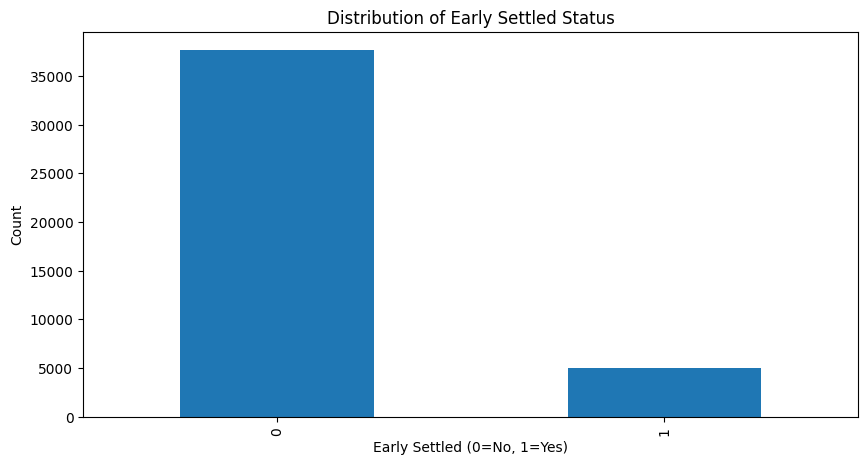

Early Settlement Rate: 11.78%
Not early settled: 88.22%


In [136]:
# Show the distribution of target variable: early_settled
plt.figure(figsize=(10, 5))
df_loans['early_settled'].value_counts().plot(kind='bar')
plt.xlabel('Early Settled (0=No, 1=Yes)')
plt.ylabel('Count')
plt.title('Distribution of Early Settled Status')
plt.show()

# Slightly imbalanced dataset, may potentially cause problems for the model.

early_settlement_rate = df_loans['early_settled'].mean()
print(f"Early Settlement Rate: {early_settlement_rate:.2%}")
print(f"Not early settled: {1-early_settlement_rate:.2%}")

There is a moderate class imbalance. 11.8% minority class. Potential problems include: models may be biased towards the majority class, potentially resulting in poor performance on the minority class.

One way to handle an imbalanced dataset is to downsample and upweight the majority class. Can also oversample the minority class.

In [137]:
# Understanding loans dataset

loans_numerical_cols = df_loans.select_dtypes(include=[np.number]).columns.tolist()
loans_categorical_cols = df_loans.select_dtypes(exclude=[np.number]).columns.tolist()

# print(loans_numerical_cols)
# print(loans_categorical_cols)

# Removing target and id from loans dataset (numerical). Removing
# originationDate from categorical as there are many unique values.
if 'early_settled' in loans_numerical_cols:
    loans_numerical_cols.remove('early_settled')
if 'id' in loans_numerical_cols:
    loans_numerical_cols.remove('id')
if 'originationDate' in loans_categorical_cols:
    loans_categorical_cols.remove('originationDate')

print(loans_numerical_cols)
print(loans_categorical_cols)

for col in loans_numerical_cols:
  print(col)
  summary = df_loans.groupby('early_settled')[col].agg(['count', 'mean', 'std', 'median']).round(2)
  display(summary)

for col in loans_categorical_cols:
  print("Distribution of Cateogorical variables")
  cross_tab = pd.crosstab(df_loans[col], df_loans['early_settled'], normalize='index') * 100
  display(cross_tab.round(2))

['income', 'interestRate', 'amount', 'term']
['homeOwnerStatus', 'employmentStatus']
income


,count,mean,std,median
early_settled,,,,
0,37638,1977.55,1431.58,1698.0
1,5024,2061.82,2330.15,1776.0


interestRate


,count,mean,std,median
early_settled,,,,
0,37638,19.99,10.58,18.60
1,5024,20.21,10.35,19.26


amount


,count,mean,std,median
early_settled,,,,
0,37638,4608.10,3943.22,3500.0
1,5024,3687.65,3338.44,2500.0


term


,count,mean,std,median
early_settled,,,,
0,37638,35.32,15.24,36.0
1,5024,30.29,15.36,24.0


Distribution of Cateogorical variables


early_settled,0,1
homeOwnerStatus,,
Own,85.61,14.39
Rent,89.30,10.70


Distribution of Cateogorical variables


early_settled,0,1
employmentStatus,,
Employed - full time,87.71,12.29
Employed - part time,89.90,10.10
Retired,93.09,6.91
Self employed,91.25,8.75


Shows us that early settlers tend to have a higher income, smaller loan amounts, shorter terms, and slgihtly higher rates.

Business implication being higher income customers being able to pay off loans early. Smaller loans are easier to settle early, higher rates may motivate people to pay off earlier.

In [138]:
# Merge the loans (left join) and attributes tables on loan_id

df = df_loans.merge(df_attributes, left_on='id', right_on='loan_id', how='left')
print(df.shape)
print(df.isnull().any().any())

(42662, 30)
False


In [139]:
numerical_cols = df_loans.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(numerical_cols)
print(categorical_cols)

['id', 'income', 'interestRate', 'amount', 'term', 'early_settled']
['originationDate', 'homeOwnerStatus', 'employmentStatus']


In [140]:
for col in categorical_cols:
  print(f"{col}: {df[col].nunique()}")

# originationDate has 42662 unique values. Drop before one-hot encoding.

originationDate: 42662
homeOwnerStatus: 2
employmentStatus: 4


In [141]:
df = df.drop('originationDate', axis=1)


In [142]:
categorical_cols.remove('originationDate')
encoder = LabelEncoder()
df_correlation = df.copy()
for col in categorical_cols:
  df_correlation[col] = encoder.fit_transform(df_correlation[col])
# Use LabelEncoder for correlation analysis only, creates false ordinal relationships.

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

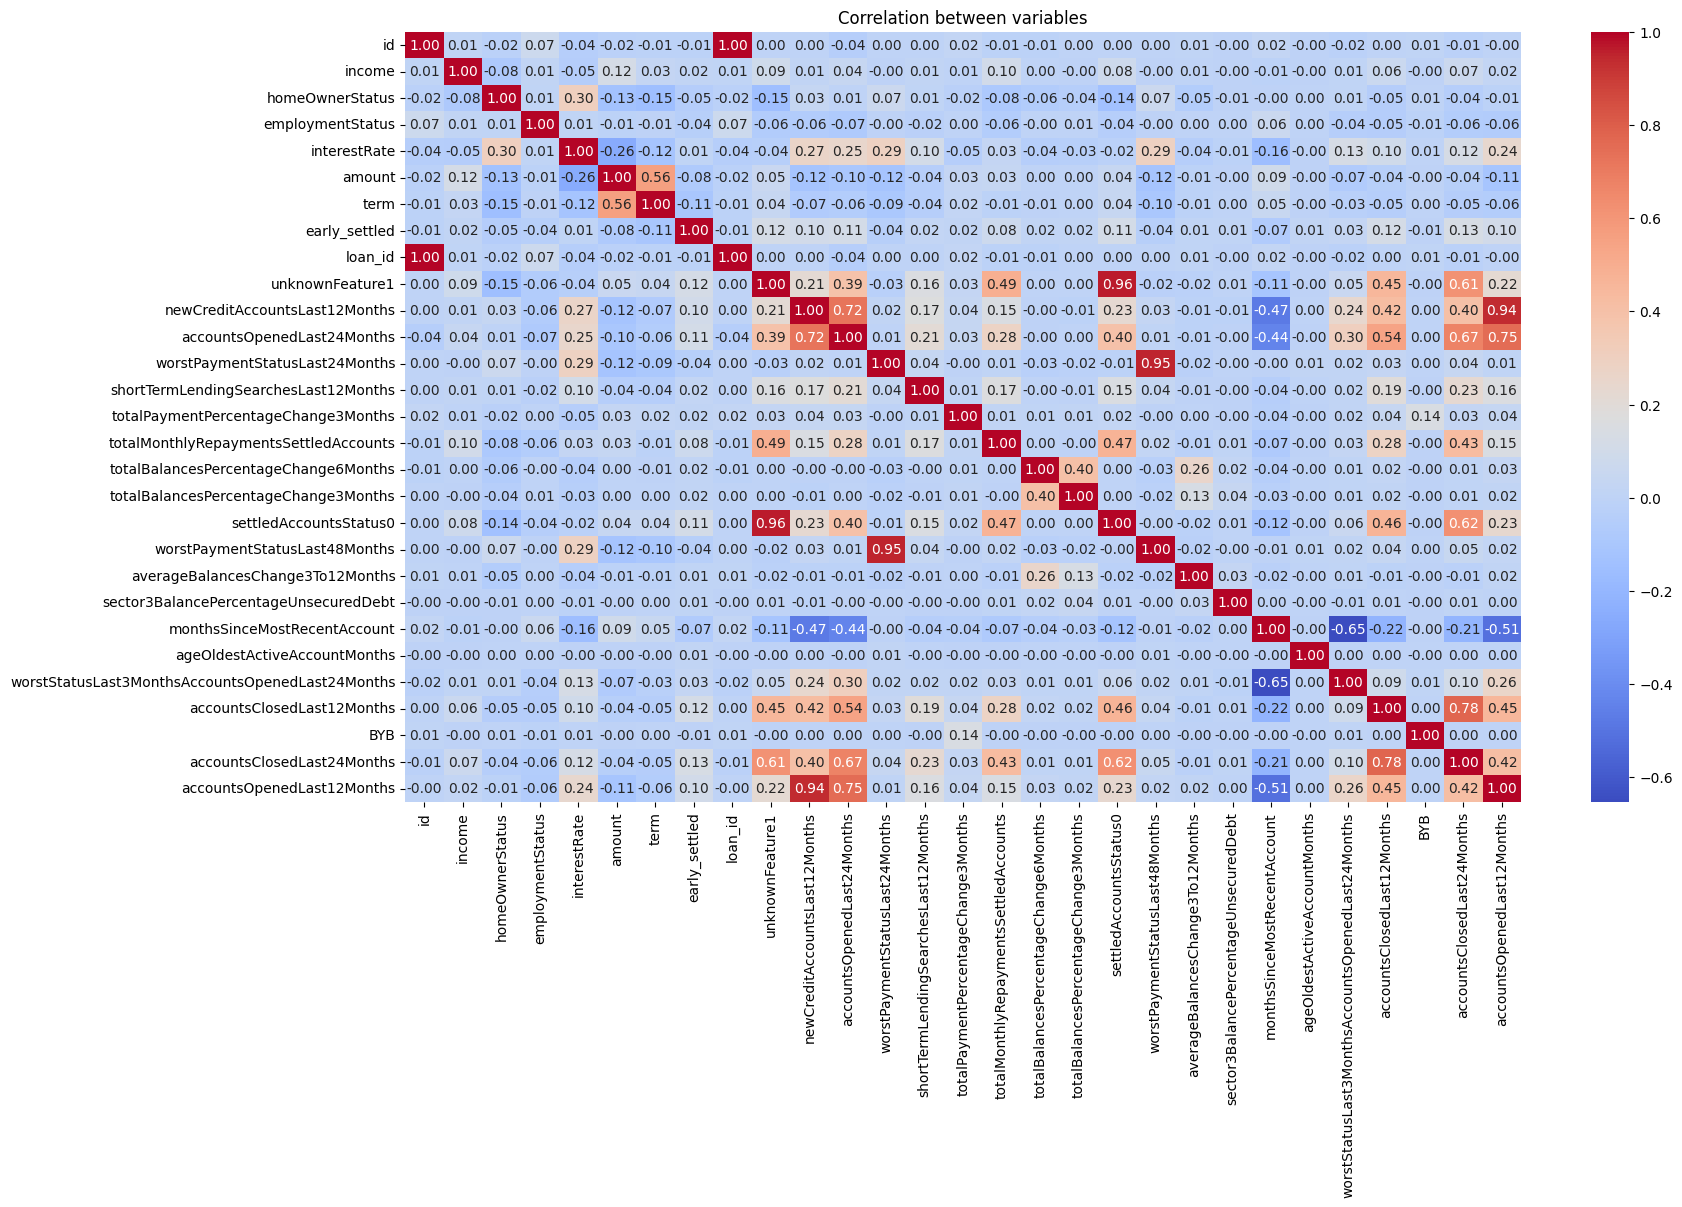

In [143]:
# Viewing df_correlation, used LabelEncoder for this.
plt.figure(figsize=(18,10))
sns.heatmap(df_correlation.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between variables")
plt.show()

In [144]:
correlation_matrix = df.corr()
correlation_pairs= correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]
sorted_correlations = correlation_pairs.abs().sort_values(ascending=False).reset_index()
sorted_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(sorted_correlations.head(15))

                         Feature 1                       Feature 2  \
0                               id                         loan_id   
1                          loan_id                              id   
2           settledAccountsStatus0                 unknownFeature1   
3                  unknownFeature1          settledAccountsStatus0   
4   worstPaymentStatusLast48Months  worstPaymentStatusLast24Months   
5   worstPaymentStatusLast24Months  worstPaymentStatusLast48Months   
6       accountsOpenedLast12Months   newCreditAccountsLast12Months   
7    newCreditAccountsLast12Months      accountsOpenedLast12Months   
8       accountsClosedLast24Months      accountsClosedLast12Months   
9       accountsClosedLast12Months      accountsClosedLast24Months   
10      accountsOpenedLast12Months      accountsOpenedLast24Months   
11      accountsOpenedLast24Months      accountsOpenedLast12Months   
12      accountsOpenedLast24Months   newCreditAccountsLast12Months   
13   newCreditAccoun

The above shows feature pairs that are highly correlated. Now want to see the features that correspond the most with the target variable (early settled).

In [145]:
target_correlations = correlation_matrix['early_settled'].abs().sort_values(ascending=False)
target_correlations = target_correlations.drop('early_settled')
print(target_correlations.head(20))
# Shows the top 20 features that correlate with early settlement from combined
# loans and attributes dataset.

accountsClosedLast24Months                          0.129384
unknownFeature1                                     0.117639
accountsClosedLast12Months                          0.117404
accountsOpenedLast24Months                          0.114775
settledAccountsStatus0                              0.111082
term                                                0.105770
accountsOpenedLast12Months                          0.099429
newCreditAccountsLast12Months                       0.098084
totalMonthlyRepaymentsSettledAccounts               0.076738
amount                                              0.076305
monthsSinceMostRecentAccount                        0.066208
homeOwnerStatus_Rent                                0.051946
worstPaymentStatusLast24Months                      0.038754
worstPaymentStatusLast48Months                      0.035954
worstStatusLast3MonthsAccountsOpenedLast24Months    0.030039
employmentStatus_Retired                            0.026462
shortTermLendingSearches

income: outlier amount 3407.5
income: 2538 outliers (5.9%)
amount: outlier amount 12000.0
amount: 1930 outliers (4.5%)
term: outlier amount 84.0
term: 0 outliers (0.0%)
interestRate: outlier amount 54.86
interestRate: 0 outliers (0.0%)
unknownFeature1: outlier amount 11.0
unknownFeature1: 1972 outliers (4.6%)
totalMonthlyRepaymentsSettledAccounts: outlier amount 1858.0
totalMonthlyRepaymentsSettledAccounts: 3854 outliers (9.0%)
monthsSinceMostRecentAccount: outlier amount 23.0
monthsSinceMostRecentAccount: 2295 outliers (5.4%)


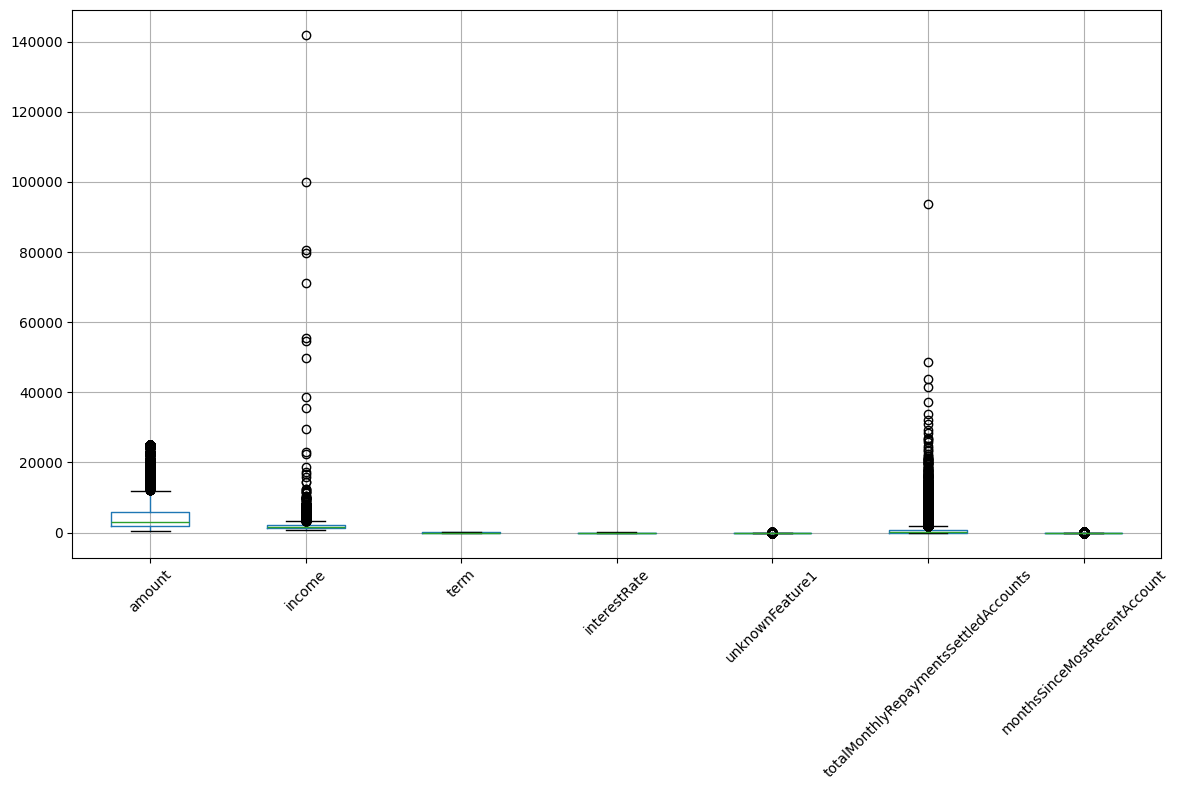

In [146]:
# Check outliers in the key numerical columns
outlier_cols = ['income', 'amount', 'term', 'interestRate', 'unknownFeature1',
              'totalMonthlyRepaymentsSettledAccounts', 'monthsSinceMostRecentAccount']

for col in outlier_cols:
   Q1 = df[col].quantile(0.25)
   Q3 = df[col].quantile(0.75)
   IQR = Q3 - Q1
   outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
   outlier_amount = Q3 + 1.5*IQR
   print(f"{col}: outlier amount {outlier_amount}")
   print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

plt.figure(figsize=(12, 8))
df[['amount', 'income', 'term', 'interestRate', 'unknownFeature1',
              'totalMonthlyRepaymentsSettledAccounts', 'monthsSinceMostRecentAccount']].boxplot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [147]:

print(df_loans['interestRate'].describe())

count    42662.000000
mean        20.012905
std         10.551932
min          3.620000
25%         10.860000
50%         18.700000
75%         28.460000
max         43.000000
Name: interestRate, dtype: float64


We can see that an outlier for amount is typically greater than 12000.

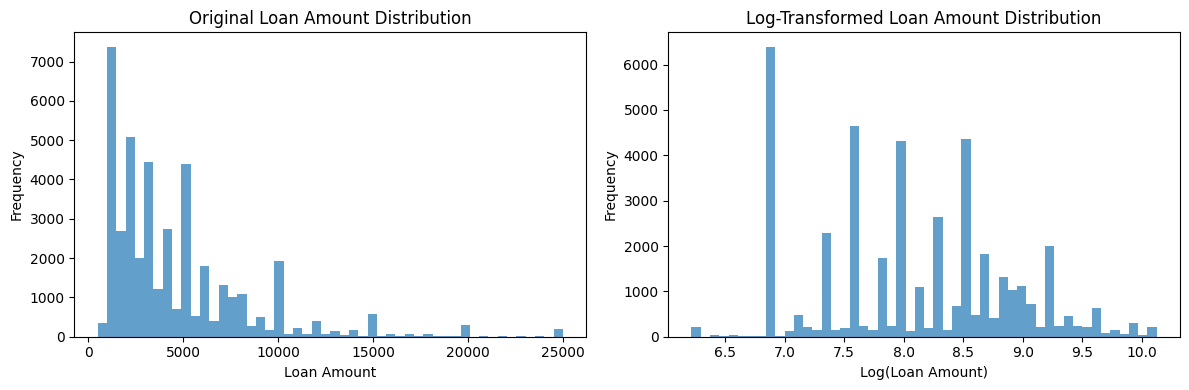

In [148]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df_loans['amount'], bins=50, alpha=0.7)
plt.title('Original Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(np.log1p(df_loans['amount']), bins=50, alpha=0.7)
plt.title('Log-Transformed Loan Amount Distribution')
plt.xlabel('Log(Loan Amount)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

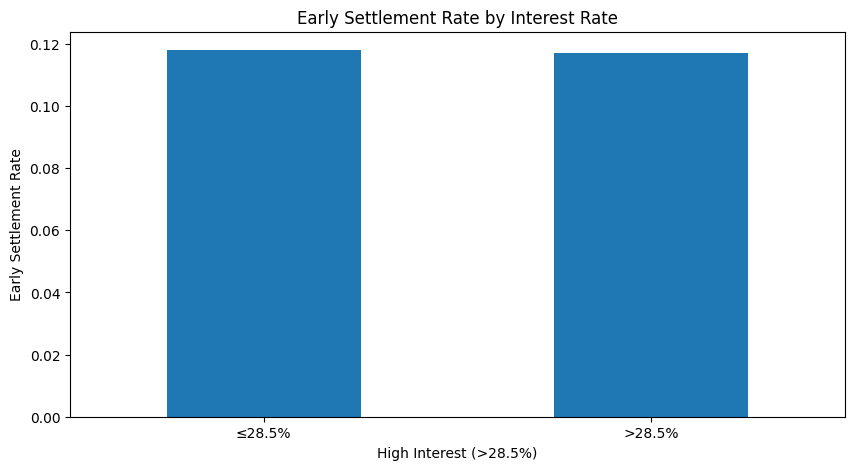

In [149]:
plt.figure(figsize=(10, 5))
# Using 28.5 from 75 percentile. We can see little difference in early settlement rates.
high_interest_settlement = df_loans.groupby(df_loans['interestRate'] > 28.5)['early_settled'].mean()
high_interest_settlement.plot(kind='bar')
plt.title('Early Settlement Rate by Interest Rate')
plt.xlabel('High Interest (>28.5%)')
plt.ylabel('Early Settlement Rate')
plt.xticks([0, 1], ['≤28.5%', '>28.5%'], rotation=0)
plt.show()

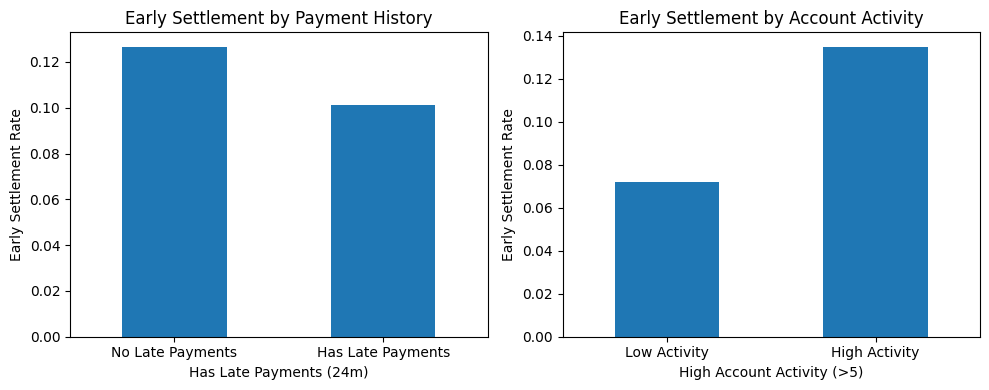

In [150]:
merged_data = df_loans.merge(df_attributes, left_on='id', right_on='loan_id', how='left')
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
late_payment_settlement = merged_data.groupby(merged_data['worstPaymentStatusLast24Months'] > 0)['early_settled'].mean()
late_payment_settlement.plot(kind='bar')
plt.title('Early Settlement by Payment History')
plt.xlabel('Has Late Payments (24m)')
plt.ylabel('Early Settlement Rate')
plt.xticks([0, 1], ['No Late Payments', 'Has Late Payments'], rotation=0)

plt.subplot(1, 2, 2)
total_activity = (merged_data['accountsOpenedLast12Months'] +
                 merged_data['accountsClosedLast12Months'] +
                 merged_data['accountsOpenedLast24Months'] +
                 merged_data['accountsClosedLast24Months'])
high_activity_settlement = merged_data.groupby(total_activity > 5)['early_settled'].mean()
high_activity_settlement.plot(kind='bar')
plt.title('Early Settlement by Account Activity')
plt.xlabel('High Account Activity (>5)')
plt.ylabel('Early Settlement Rate')
plt.xticks([0, 1], ['Low Activity', 'High Activity'], rotation=0)
plt.tight_layout()
plt.show()

Number of distinct loan ids:42624
Avg number of rows per loan: 289.4


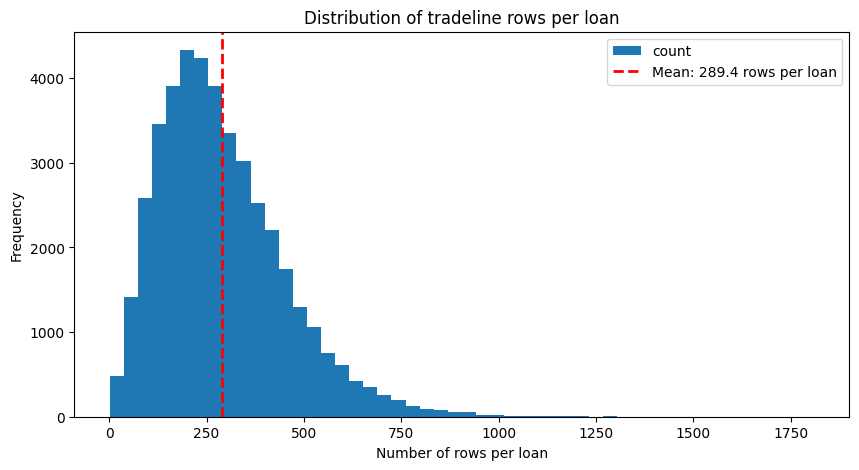

In [151]:
# Exploration of tradeline dataset
# This dataset has multiple rows per loan_id

print(f"Number of distinct loan ids:{df_tradeline['loan_id'].nunique()}")
print(f"Avg number of rows per loan: {len(df_tradeline) / df_tradeline['loan_id'].nunique():.1f}")

plt.figure(figsize=(10, 5))
row_counts = df_tradeline['loan_id'].value_counts()
row_counts.plot(kind='hist', bins=50)
mean_rows = row_counts.mean()
plt.axvline(mean_rows, color='red', linestyle='--', linewidth=2,
           label=f'Mean: {mean_rows:.1f} rows per loan')

plt.xlabel('Number of rows per loan')
plt.ylabel('Frequency')
plt.title('Distribution of tradeline rows per loan')
plt.legend()
plt.show()

In [152]:

print(f"Tradeline shape: {df_tradeline.shape}")
print(df_tradeline.head())
print(df_tradeline.columns.tolist())

Tradeline shape: (12335057, 5)
   loan_id account_type  balance        Date status
0   323693  Credit Card      0.0  2019-05-01      0
1   323693  Credit Card      0.0  2019-04-01      0
2   323693  Credit Card      0.0  2019-03-01      0
3   323693  Credit Card      0.0  2019-02-01      0
4   323693  Credit Card    264.0  2019-01-01      0
['loan_id', 'account_type', 'balance', 'Date', 'status']


In [153]:
print(df_tradeline['status'].value_counts())

status
0    11362926
U      518982
D      267174
1       85468
2       32319
6       22535
3       18669
4       11976
5        8297
?        6711
Name: count, dtype: int64


In [154]:
print(df_tradeline['account_type'].value_counts())

account_type
Credit Card        5402905
Current Account    4116172
Unsecured Loan     2815980
Name: count, dtype: int64


In [155]:
tradeline_with_target = df_tradeline.merge(df_loans[['id', 'early_settled']], left_on='loan_id', right_on='id', how='left')


In [156]:
tradeline_with_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335057 entries, 0 to 12335056
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   loan_id        int64  
 1   account_type   object 
 2   balance        float64
 3   Date           object 
 4   status         object 
 5   id             int64  
 6   early_settled  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 658.8+ MB


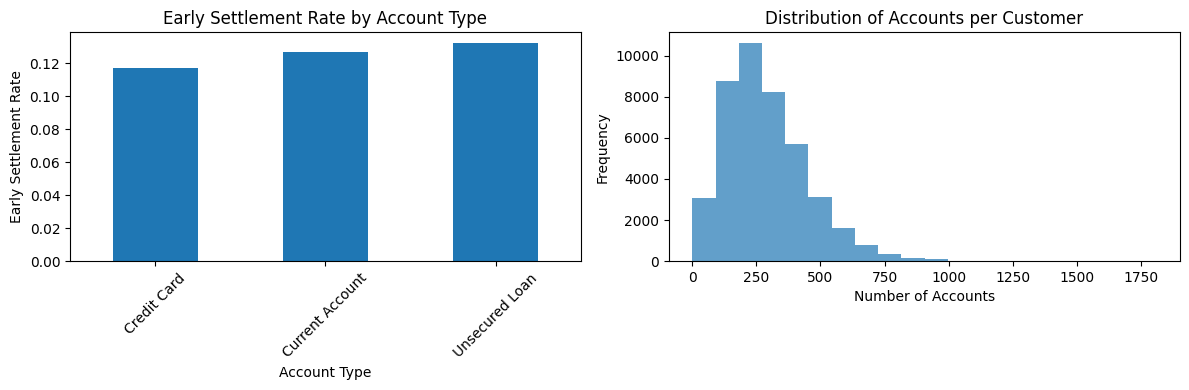

In [157]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
account_type_settlement = tradeline_with_target.groupby('account_type')['early_settled'].mean()
account_type_settlement.plot(kind='bar')
plt.title('Early Settlement Rate by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Early Settlement Rate')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
accounts_per_loan = df_tradeline['loan_id'].value_counts()
plt.hist(accounts_per_loan, bins=20, alpha=0.7)
plt.title('Distribution of Accounts per Customer')
plt.xlabel('Number of Accounts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2719683803.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_settlement = tradeline_with_target.groupby('balance_category')['early_settled'].mean()
/tmp/ipython-input-2719683803.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  zero_balance_stats = df_tradeline.groupby('loan_id').apply(lambda x: (x['balance'] == 0).mean()).reset_index(name='zero_balance_pct')
/tmp/ipython-input-2719683803.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to 

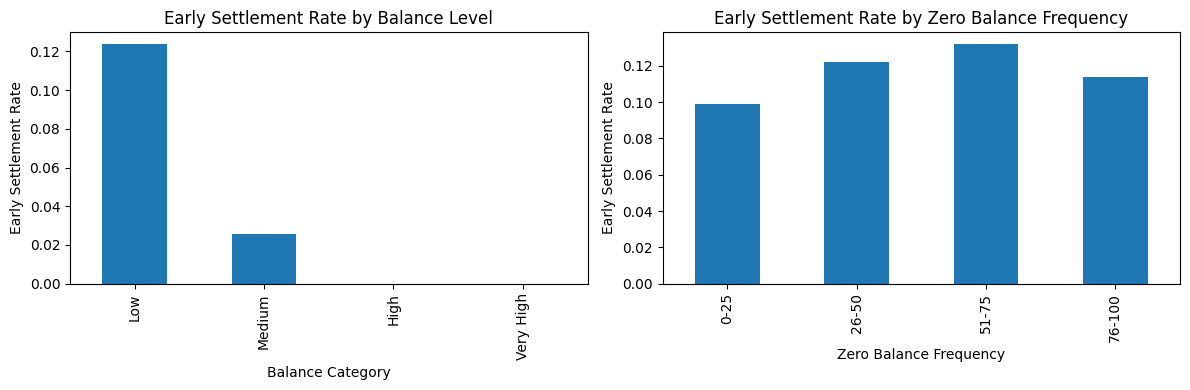

In [158]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

tradeline_with_target['balance_category'] = pd.cut(tradeline_with_target['balance'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
balance_settlement = tradeline_with_target.groupby('balance_category')['early_settled'].mean()
balance_settlement.plot(kind='bar')
plt.title('Early Settlement Rate by Balance Level')
plt.xlabel('Balance Category')
plt.ylabel('Early Settlement Rate')


plt.subplot(1, 2, 2)

zero_balance_stats = df_tradeline.groupby('loan_id').apply(lambda x: (x['balance'] == 0).mean()).reset_index(name='zero_balance_pct')
zero_balance_with_target = zero_balance_stats.merge(df_loans[['id', 'early_settled']], left_on='loan_id', right_on='id')

zero_balance_with_target['zero_pct_category'] = pd.cut(zero_balance_with_target['zero_balance_pct'], bins=4, labels=['0-25', '26-50', '51-75', '76-100'])
zero_settlement = zero_balance_with_target.groupby('zero_pct_category')['early_settled'].mean()
zero_settlement.plot(kind='bar')
plt.title('Early Settlement Rate by Zero Balance Frequency')
plt.xlabel('Zero Balance Frequency')
plt.ylabel('Early Settlement Rate')
plt.tight_layout()
plt.show()

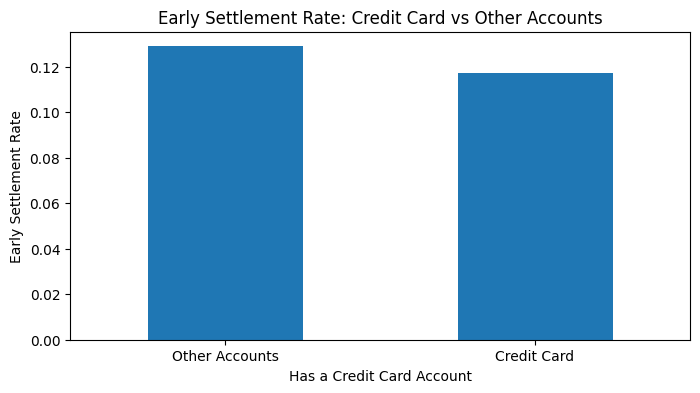

In [159]:

plt.figure(figsize=(8, 4))
has_cc_settlement = tradeline_with_target.groupby(tradeline_with_target['account_type'] == 'Credit Card')['early_settled'].mean()
has_cc_settlement.plot(kind='bar')
plt.title('Early Settlement Rate: Credit Card vs Other Accounts')
plt.xlabel('Has a Credit Card Account')
plt.ylabel('Early Settlement Rate')
plt.xticks([0, 1], ['Other Accounts', 'Credit Card'], rotation=0)
plt.show()

## Feature Engineering

In [160]:
# Feature engineering starting with loans dataset first.
features = df_loans.copy()
features = features.drop('originationDate',axis=1) # Drop originationDate, many unique values.
features['log_loan'] = np.log1p(features['amount'])
features['large_loan'] = (features['amount']>12000).astype(int) # Based on outlier analysis
features['is_short_term'] = (features['term'] <= 12).astype(int)
features['monthly_payment'] = features['amount'] / features['term']
features['high_monthly_payment'] = (features['monthly_payment'] > 500).astype(int)

# Feature engineer attributes dataset
features = features.merge(df_attributes, left_on='id', right_on='loan_id', how='left')

# Payment behavior flags
features['any_late_payments_24m'] = (features['worstPaymentStatusLast24Months'] > 0).astype(int)

# Check if we can compare 24m vs 48m payment status
if 'worstPaymentStatusLast48Months' in features.columns:
    features['recent_payment_worsening'] = (features['worstPaymentStatusLast24Months'] > features['worstPaymentStatusLast48Months']).astype(int)

# Any changes to account
features['net_account_change'] = (features['accountsOpenedLast12Months'] - features['accountsClosedLast12Months'])

# Balance amount cahanges
features['balances_increasing'] = (features['totalBalancesPercentageChange3Months'] > 0.05).astype(int)

# Credit search
features['credit_searches'] = (features['shortTermLendingSearchesLast12Months'] > 3).astype(int)

# High account activity (opening/closing lots of accounts)
total_account_activity = (
    features['accountsOpenedLast12Months'] +
    features['accountsClosedLast12Months'] +
    features['accountsOpenedLast24Months'] +
    features['accountsClosedLast24Months']
)
features['high_account_activity'] = (total_account_activity > 5).astype(int)


In [161]:
# Tradeline feature engineering
tradeline_agg = {}

for loan_id in df_tradeline['loan_id'].unique():
    loan_data = df_tradeline[df_tradeline['loan_id'] == loan_id]
    agg = {
        'loan_id': loan_id,
        'num_accounts': len(loan_data),
        'account_types': loan_data['account_type'].nunique(),
        'has_credit_card': int('Credit Card' in loan_data['account_type'].values)
    }


    balances = loan_data['balance'].dropna()
    if len(balances) > 0:
        agg['avg_balance'] = balances.mean()
        agg['max_balance'] = balances.max()
        agg['zero_balance_pct'] = (balances == 0).mean()

        if len(balances) >= 3:
            trend = np.polyfit(range(len(balances)), balances, 1)[0]
            agg['balance_increasing'] = int(trend > 0)

    agg['account_diversity'] = loan_data['account_type'].nunique() / len(loan_data)

    tradeline_agg[loan_id] = agg

tradeline_features = pd.DataFrame.from_dict(tradeline_agg, orient='index').reset_index(drop=True)
features = features.merge(tradeline_features, on='loan_id', how='left')

In [162]:
features.shape

(42662, 48)

In [163]:
# Fill missing values
for col in features.columns:
    if col not in ['loan_id', 'early_settled']:
        if features[col].dtype in ['int64', 'float64', 'bool']:
            features[col] = features[col].fillna(features[col].median())
        else:
            features[col] = features[col].fillna('Unknown')


features = pd.get_dummies(features, drop_first=True)

In [164]:
df_model = features.copy()
print(df_model.shape)

for col in df_model.columns:
    if df_model[col].dtype in ['float64', 'int64']:
        corr = df_model[col].corr(df_model['early_settled'])
        print(f"{col}: {corr:.3f}")

(42662, 50)
id: -0.011
income: 0.017
interestRate: 0.007
amount: -0.076
term: -0.106
early_settled: 1.000
log_loan: -0.089
large_loan: -0.026
is_short_term: 0.100
monthly_payment: -0.022
high_monthly_payment: -0.009
loan_id: -0.011
unknownFeature1: 0.118
newCreditAccountsLast12Months: 0.098
accountsOpenedLast24Months: 0.115
worstPaymentStatusLast24Months: -0.039
shortTermLendingSearchesLast12Months: 0.023
totalPaymentPercentageChange3Months: 0.015
totalMonthlyRepaymentsSettledAccounts: 0.077
totalBalancesPercentageChange6Months: 0.016
totalBalancesPercentageChange3Months: 0.015
settledAccountsStatus0: 0.111
worstPaymentStatusLast48Months: -0.036
averageBalancesChange3To12Months: 0.008
sector3BalancePercentageUnsecuredDebt: 0.007
monthsSinceMostRecentAccount: -0.066
ageOldestActiveAccountMonths: 0.013
worstStatusLast3MonthsAccountsOpenedLast24Months: 0.030
accountsClosedLast12Months: 0.117
BYB: -0.006
accountsClosedLast24Months: 0.129
accountsOpenedLast12Months: 0.099
any_late_payments_

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


## Build Model


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report


X = df_model.drop(['id', 'loan_id', 'early_settled'], axis=1)
y = df_model['early_settled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build a Baseline Logistic Regression Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=1000,random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
lr_pred = lr_model.predict(X_test_scaled)

lr_auc = roc_auc_score(y_test, lr_proba)

print(f"AUC Score: {lr_auc:.3f}")
print(f"Mean prediction: {lr_proba.mean():.1%}")
print(f"Prediction range: {lr_proba.min():.3f} to {lr_proba.max():.3f}")


print(classification_report(y_test, lr_pred))


AUC Score: 0.676
Mean prediction: 11.9%
Prediction range: 0.000 to 0.825
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7528
           1       0.27      0.01      0.02      1005

    accuracy                           0.88      8533
   macro avg       0.57      0.50      0.48      8533
weighted avg       0.81      0.88      0.83      8533



In [166]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)


rf_model.fit(X_train, y_train)

# Predictions
rf_proba = rf_model.predict_proba(X_test)[:, 1]
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_auc = roc_auc_score(y_test, rf_proba)

threshold = 0.15
rf_pred_custom = (rf_proba > threshold).astype(int)

print(f"AUC Score: {rf_auc:.3f}")
print(f"Mean prediction: {rf_proba.mean():.1%}")
print(f"Prediction range: {rf_proba.min():.3f} to {rf_proba.max():.3f}")

print(classification_report(y_test, rf_pred_custom))

# Feature importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(rf_importance.head())


AUC Score: 0.681
Mean prediction: 11.9%
Prediction range: 0.025 to 0.487
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      7528
           1       0.22      0.44      0.29      1005

    accuracy                           0.75      8533
   macro avg       0.57      0.61      0.57      8533
weighted avg       0.83      0.75      0.78      8533

                                  feature  importance
15  totalMonthlyRepaymentsSettledAccounts    0.056511
39                            max_balance    0.047155
3                                    term    0.045566
40                       zero_balance_pct    0.045249
27             accountsClosedLast24Months    0.045178


I optimized the decision threshold based on business requirements rather than using the default statistical threshold. This allows Lendable to choose their preferred trade-off between identifying early settlement risk and avoiding false alarms in loan pricing decisions.

In [167]:
import xgboost as xgb

# Downside of XGBoost is black box.

model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    #scale_pos_weight=1.5,  # Handle dataset imbalance
    random_state=42,
    eval_metric='auc'
)

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC Score: {auc_score:.3f}")
print(f"Mean prediction: {y_pred_proba.mean():.1%}")
print(f"Prediction range: {y_pred_proba.min():.3f} to {y_pred_proba.max():.3f}")

print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

AUC Score: 0.684
Mean prediction: 11.7%
Prediction range: 0.006 to 0.858
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7528
           1       0.50      0.02      0.04      1005

    accuracy                           0.88      8533
   macro avg       0.69      0.51      0.49      8533
weighted avg       0.84      0.88      0.83      8533

                                  feature  importance
27             accountsClosedLast24Months    0.084352
3                                    term    0.078676
34                  high_account_activity    0.055232
10          newCreditAccountsLast12Months    0.038496
43                   homeOwnerStatus_Rent    0.034767
19         worstPaymentStatusLast48Months    0.033972
12         worstPaymentStatusLast24Months    0.029698
9                         unknownFeature1    0.028973
11             accountsOpenedLast24Months    0.027355
15  totalMonthlyRepaymentsSettledAccounts    0.026567


We can see that for Class 0 we have very good performance, 88% precision and 100% recall. However, for Class 1 we have poorer precision and poorer recall (50% and 2%). This is likely due to the imbalanced dataset.

Predicts similar 11.7% vs actual 11.8% early settlement, 0.682 AUC. However, the recall (2%) is extremely low, meaning we're missing 98% of customers who actually settle early. For Lendable, this creates a trade-off: the model is excellent for confidently identifying a small subset of high-risk customers for premium pricing, but struggles as a comprehensive early settlement detection system.

In [168]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Find optimal threshold
# There is a tradeoff between precision and recall.
# For Lendable, precision is likely to matter more as if we are targeting them with specific
# pricing strategies, we must predict correctly.
optimal_threshold = 0.35
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7528
           1       0.40      0.09      0.15      1005

    accuracy                           0.88      8533
   macro avg       0.64      0.54      0.54      8533
weighted avg       0.83      0.88      0.84      8533



In [169]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report

# Train LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=100,max_depth=6,learning_rate=0.1,num_leaves=31,random_state=42,verbose=-1)
lgb_model.fit(X_train, y_train)

# Predictions
lgb_proba = lgb_model.predict_proba(X_test)[:, 1]
lgb_pred = lgb_model.predict(X_test)

# Evaluate
lgb_auc = roc_auc_score(y_test, lgb_proba)

print(f"AUC Score: {lgb_auc:.3f}")
print(f"Mean prediction: {lgb_proba.mean():.1%}")
print(f"Prediction range: {lgb_proba.min():.3f} to {lgb_proba.max():.3f}")

print(classification_report(y_test, lgb_pred))

# Feature importance
lgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)


print(lgb_importance.head())

AUC Score: 0.689
Mean prediction: 11.8%
Prediction range: 0.007 to 0.924
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7528
           1       0.47      0.02      0.04      1005

    accuracy                           0.88      8533
   macro avg       0.68      0.51      0.49      8533
weighted avg       0.84      0.88      0.83      8533

                         feature  importance
40              zero_balance_pct         205
39                   max_balance         171
0                         income         160
1                   interestRate         160
23  ageOldestActiveAccountMonths         147


In [170]:
threshold = 0.2
# Adjust threshold to try to get similar prediciton rate to training set.
# Goal is to do this so the model can understand real world scenarios.
# Allows Lendable to forecast revenue accurately.
# However downside is that the goal isn't just prediction accuracy.
lgb_pred_custom = (lgb_proba > threshold).astype(int)

print(classification_report(y_test, lgb_pred_custom))

print(f"Positive predictions: {lgb_pred_custom.sum()} out of {len(lgb_pred_custom)}")

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7528
           1       0.28      0.31      0.29      1005

    accuracy                           0.82      8533
   macro avg       0.59      0.60      0.60      8533
weighted avg       0.83      0.82      0.83      8533

Positive predictions: 1132 out of 8533


Hyperparameter tuning to see if we can improve the LightGBM any further.

In [171]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1, 0.15],
    'num_leaves': [31, 63],
    'min_child_samples': [10, 20]
}

lgb_grid = GridSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42, verbose=-1),
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

lgb_grid.fit(X_train, y_train)

print(f"Best Parameters: {lgb_grid.best_params_}")

best_lgb_model = lgb_grid.best_estimator_

best_proba = best_lgb_model.predict_proba(X_test)[:, 1]
best_auc = roc_auc_score(y_test, best_proba)

print(f"Tuned LightGBM AUC:{best_auc:.3f}")

best_pred = (best_proba > 0.2).astype(int)
print(f"Mean prediction with 0.2 threshold: {best_pred.mean():.1%}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'min_child_samples': 10, 'n_estimators': 100, 'num_leaves': 31}
Tuned LightGBM AUC:0.691
Mean prediction with 0.2 threshold: 11.9%


Try oversampling to deal with imbalanced dataset to see if we can improve any further.

In [172]:
# Oversampling with SMOTE
# Rather do this than undersampling as we already have very few datapoints. Loss of information.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_filled = X_train.fillna(0)
X_test_filled = X_test.fillna(0)

X_train_smote, y_train_smote = smote.fit_resample(X_train_filled, y_train)


In [173]:
# Using smote with LightGBM
model_smote = lgb.LGBMClassifier(n_estimators=100,max_depth=6,learning_rate=0.1,num_leaves=31,random_state=42,verbose=-1)
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test_filled)
y_pred_smote_proba = model_smote.predict_proba(X_test_filled)[:, 1]


print("AUC:", roc_auc_score(y_test, y_pred_smote_proba))
print(classification_report(y_test, y_pred_smote))

# AUC is worse.

AUC: 0.6472742557139911
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7528
           1       0.25      0.09      0.13      1005

    accuracy                           0.86      8533
   macro avg       0.57      0.53      0.53      8533
weighted avg       0.81      0.86      0.83      8533



/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


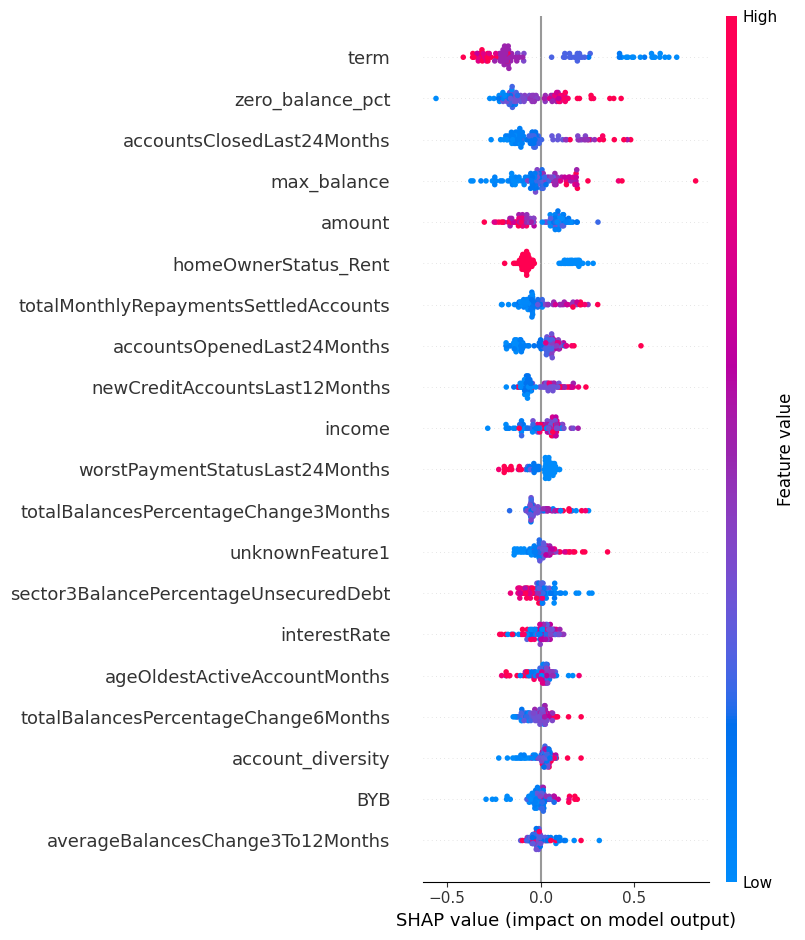

In [174]:
# Using Shap values to explain individual predictors by showing how much each feature
# contributes to a specific outcome.
# For Lendable, it is good to get lending context, useful for regulatory compliance.

import shap
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test[:100])

shap.summary_plot(shap_values, X_test[:100])

SHAP is used for model explainability and shows how each feature influences individual predictions.

SHAP analysis shows that longer terms lead to higher early settlement risk, with max_balance: higher peak balances lead to higher risk of early settlement, as well as recent account closures.

Validates feature engineering process.

## Test set

Experiment on test set now.

In [175]:

test_loans = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Interviews/DS tech test/test-set/loans_test.csv')
test_attributes = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Interviews/DS tech test/test-set/attributes_test.csv')
test_tradeline = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Interviews/DS tech test/test-set/tradeline_test.csv')

print(test_loans.shape)
print(test_attributes.shape)
print(test_tradeline.shape)

test_loans = test_loans.drop('originationDate', axis=1)

test_features = test_loans.copy()

test_features['log_loan'] = np.log1p(test_features['amount'])
test_features['large_loan'] = (test_features['amount'] > 12000).astype(int)
test_features['is_short_term'] = (test_features['term'] <= 12).astype(int)
test_features['monthly_payment'] = test_features['amount'] / test_features['term']
test_features['high_monthly_payment'] = (test_features['monthly_payment'] > 500).astype(int)

test_features = test_features.merge(test_attributes, left_on='id', right_on='loan_id', how='left')

test_features['any_late_payments_24m'] = (test_features['worstPaymentStatusLast24Months'] > 0).astype(int)
if 'worstPaymentStatusLast48Months' in test_features.columns:
    test_features['recent_payment_worsening'] = (test_features['worstPaymentStatusLast24Months'] > test_features['worstPaymentStatusLast48Months']).astype(int)
test_features['net_account_change'] = (test_features['accountsOpenedLast12Months'] - test_features['accountsClosedLast12Months'])
test_features['balances_increasing'] = (test_features['totalBalancesPercentageChange3Months'] > 0.05).astype(int)
test_features['credit_searches'] = (test_features['shortTermLendingSearchesLast12Months'] > 3).astype(int)

total_account_activity = (
    test_features['accountsOpenedLast12Months'] +
    test_features['accountsClosedLast12Months'] +
    test_features['accountsOpenedLast24Months'] +
    test_features['accountsClosedLast24Months']
)
test_features['high_account_activity'] = (total_account_activity > 5).astype(int)

test_tradeline_agg = {}

for loan_id in test_tradeline['loan_id'].unique():
    loan_data = test_tradeline[test_tradeline['loan_id'] == loan_id]

    agg = {
        'loan_id': loan_id,
        'num_accounts': len(loan_data),
        'account_types': loan_data['account_type'].nunique(),
        'has_credit_card': int('Credit Card' in loan_data['account_type'].values)
    }

    balances = loan_data['balance'].dropna()
    if len(balances) > 0:
        agg['avg_balance'] = balances.mean()
        agg['max_balance'] = balances.max()
        agg['zero_balance_pct'] = (balances == 0).mean()

        if len(balances) >= 3:
            trend = np.polyfit(range(len(balances)), balances, 1)[0]
            agg['balance_increasing'] = int(trend > 0)

    agg['account_diversity'] = loan_data['account_type'].nunique() / len(loan_data)
    test_tradeline_agg[loan_id] = agg

test_tradeline_features = pd.DataFrame.from_dict(test_tradeline_agg, orient='index').reset_index(drop=True)
test_features = test_features.merge(test_tradeline_features, on='loan_id', how='left')

for col in test_features.columns:
    if col not in ['loan_id', 'id']:
        if test_features[col].dtype in ['int64', 'float64', 'bool']:
            test_features[col] = test_features[col].fillna(test_features[col].median())
        else:
            test_features[col] = test_features[col].fillna('Unknown')

# One-hot encoding
test_features = pd.get_dummies(test_features, drop_first=True)

test_ids = test_features['id']
X_test_final = test_features.drop(['id', 'loan_id'], axis=1)

for col in X.columns:
    if col not in X_test_final.columns:
        X_test_final[col] = 0

X_test_final = X_test_final[X.columns]

test_probabilities = best_lgb_model.predict_proba(X_test_final)[:, 1]

#Apply 0.2 threshold for business decisions, 0.2 found when experimenting with LightGBM model.
test_predictions_binary = (test_probabilities > 0.2).astype(int)

print(f"Mean prediction probability: {test_probabilities.mean():.1%}")
print(f"Min prediction: {test_probabilities.min()}")
print(f"Max prediction: {test_probabilities.max()}")

print(f"Positive predictions (>0.2): {test_predictions_binary.sum():,} ({test_predictions_binary.mean():.1%})")

final_output = pd.DataFrame({
    'Id': test_ids,
    'early_settlement_probability': test_probabilities
})

save_path = '/content/gdrive/My Drive/Colab Notebooks/Interviews/DS tech test/Remy_Tran_predictions.csv'
final_output.to_csv(save_path, index=False)

print(final_output.head())
print(f"Test prediction rate: {test_probabilities.mean():.1%}")

(4741, 8)
(4741, 21)
(1383857, 5)
Mean prediction probability: 12.0%
Min prediction: 0.024913178775659843
Max prediction: 0.6508577586739535
Positive predictions (>0.2): 593 (12.5%)
       Id  early_settlement_probability
0  454474                      0.157427
1  456815                      0.106694
2  451890                      0.090379
3  461216                      0.046300
4  452683                      0.176108
Test prediction rate: 12.0%


## Business Integration

Prediction values range from 2.5% to 65.1% probability that a customer will early settle their loan.

A potential strategy / next step could be to create 10 equal deciles within these ranges. You could categorise deciles 1-5 as low propensity to early settle and 6-10 deciles as having a high propensity to early settle. This allows Lendable to potentially test different pricing strategies for the high and low propensity groups.

Testing could take place with an A/B test.